In [1]:
# Import the necessary modules and libraries
import numpy as np
from sklearn import linear_model, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix as cm
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('ggplot')

In [2]:
cancerData = datasets.load_breast_cancer()

In [3]:
print(cancerData.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [4]:
cancer_df = pd.DataFrame(cancerData.data, columns = [cancerData.feature_names])
cancer_df['cancer'] = cancerData.target 

In [5]:
cancer_df.head()

mean radius mean texture mean perimeter mean area mean smoothness  \
0       17.99        10.38         122.80    1001.0         0.11840   
1       20.57        17.77         132.90    1326.0         0.08474   
2       19.69        21.25         130.00    1203.0         0.10960   
3       11.42        20.38          77.58     386.1         0.14250   
4       20.29        14.34         135.10    1297.0         0.10030   

  mean compactness mean concavity mean concave points mean symmetry  \
0          0.27760         0.3001             0.14710        0.2419   
1          0.07864         0.0869             0.07017        0.1812   
2          0.15990         0.1974             0.12790        0.2069   
3          0.28390         0.2414             0.10520        0.2597   
4          0.13280         0.1980             0.10430        0.1809   

  mean fractal dimension  ... worst texture worst perimeter worst area  \
0                0.07871  ...         17.33          184.60     2019.0   
1                0.05667  ...         23.41          158.80     1956.0   
2                0.05999  ...         25.53          152.50     1709.0   
3                0.09744  ...         26.50           98.87      567.7   
4                0.05883  ...         16.67          152.20     1575.0   

  worst smoothness worst compactness worst concavity worst concave points  \
0           0.1622            0.6656          0.7119               0.2654   
1           0.1238            0.1866          0.2416               0.1860   
2           0.1444            0.4245          0.4504               0.2430   
3           0.2098            0.8663          0.6869               0.2575   
4           0.1374            0.2050          0.4000               0.1625   

  worst symmetry worst fractal dimension cancer  
0         0.4601                 0.11890      0  
1         0.2750                 0.08902      0  
2         0.3613                 0.08758      0  
3         0.6638                 0.17300      0  
4         0.2364                 0.07678      0  

[5 rows x 31 columns]

In [6]:
x_columns = ['mean radius', 'mean symmetry']
X = cancer_df[x_columns]
y = cancer_df.cancer

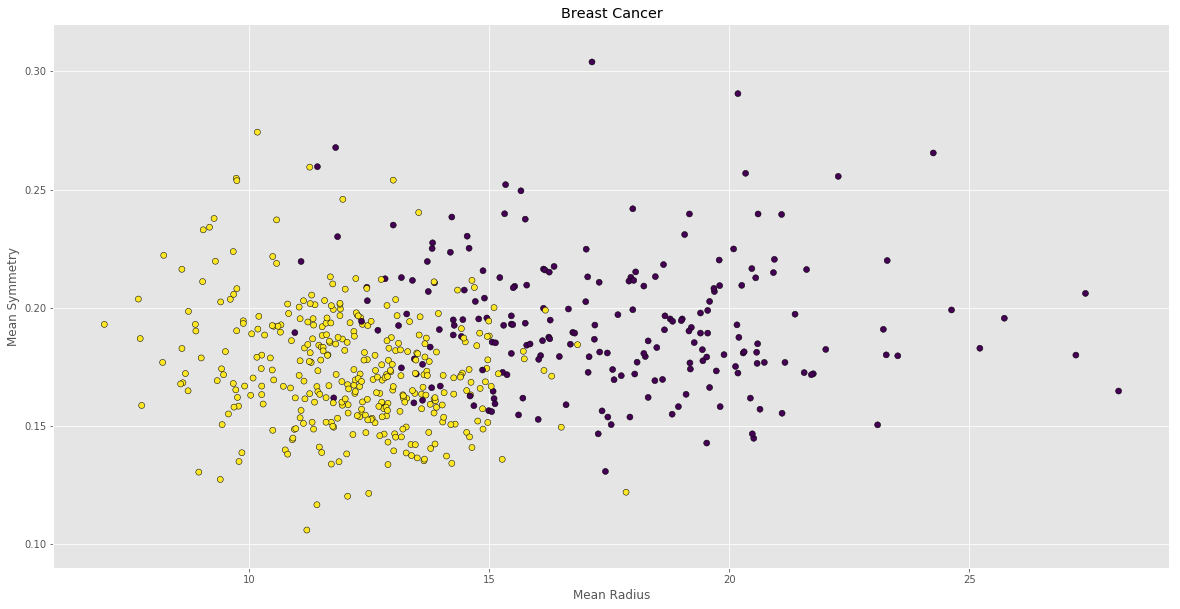

In [7]:
x1 = cancer_df['mean radius']
x2 = cancer_df['mean symmetry']
y = cancer_df.cancer

plt.figure(figsize=(20,10))

plt.title('Breast Cancer')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Symmetry')

plt.scatter(x1,x2,c=y, edgecolors='k')

plt.show()

In [8]:
#create a logistic regression classifier
lin_clf = linear_model.LogisticRegression().fit(X, y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
#we can predict the probabilities for each label
#output as probability for 0, then probability for 1 as a list
lin_clf.predict_proba(X)

array([[0.82932565, 0.17067435],
       [0.95113102, 0.04886898],
       [0.92386682, 0.07613318],
       ...,
       [0.6927092 , 0.3072908 ],
       [0.95235258, 0.04764742],
       [0.01836839, 0.98163161]])

In [10]:
#we can also make predictions based on the default threshold of 0.5
lin_clf.predict(X)

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [11]:
#just like in linear regression, we can get our weights
intercept = lin_clf.intercept_
coefs = lin_clf.coef_

In [12]:
coefs

array([[-0.54200765, -0.17670812]])

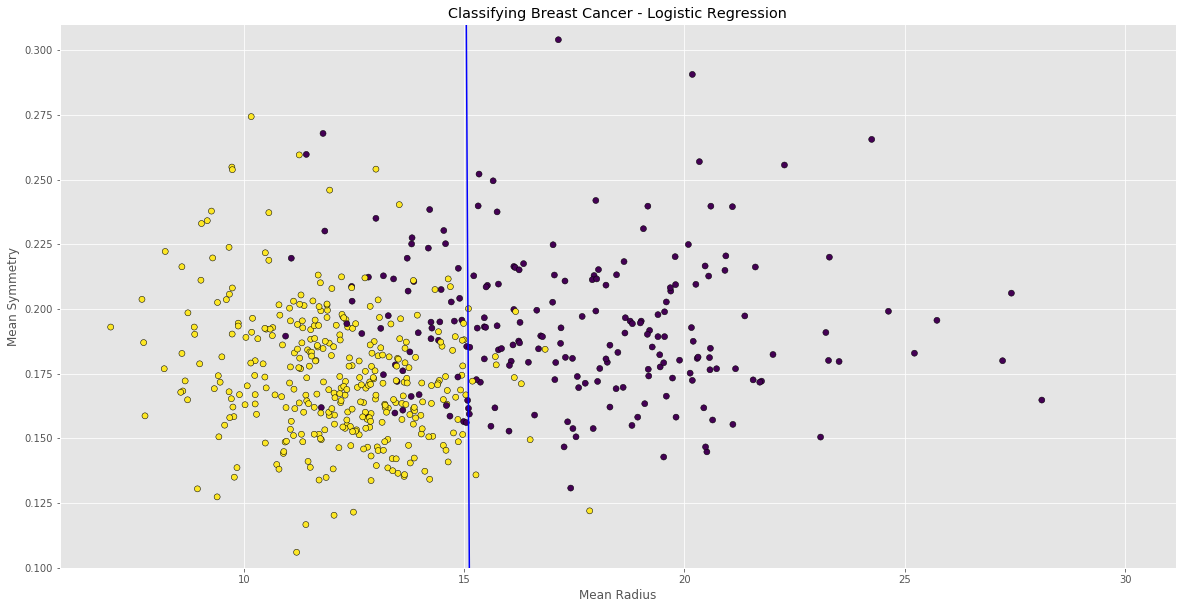

In [13]:
x1 = cancer_df['mean radius']
x2 = cancer_df['mean symmetry']
y = cancer_df.cancer
plt.figure(figsize=(20,10))
plt.title('Classifying Breast Cancer - Logistic Regression')

plt.xlabel('Mean Radius')
plt.ylabel('Mean Symmetry')

plt.scatter(x1,x2,c=y, edgecolors='k')

#hack to plot decision boundary
ex1 = np.linspace(10, 30, 100)
ex2 = -(coefs[:, 0] * ex1 + intercept) / coefs[:,1]
plt.plot(ex1, ex2, color='b')

#hack to reorient the axis limit
plt.ylim(0.1,0.31)

plt.show()

for some more simple example (including 3d) https://nbviewer.jupyter.org/github/HaFl/florianhartl.com/blob/master/Logistic_Regression_Geometric_Intuition.ipynb

### Non-Linear Classifier - Decision Tree

In [14]:
dtree = DecisionTreeClassifier(max_depth = 3).fit(X,y)

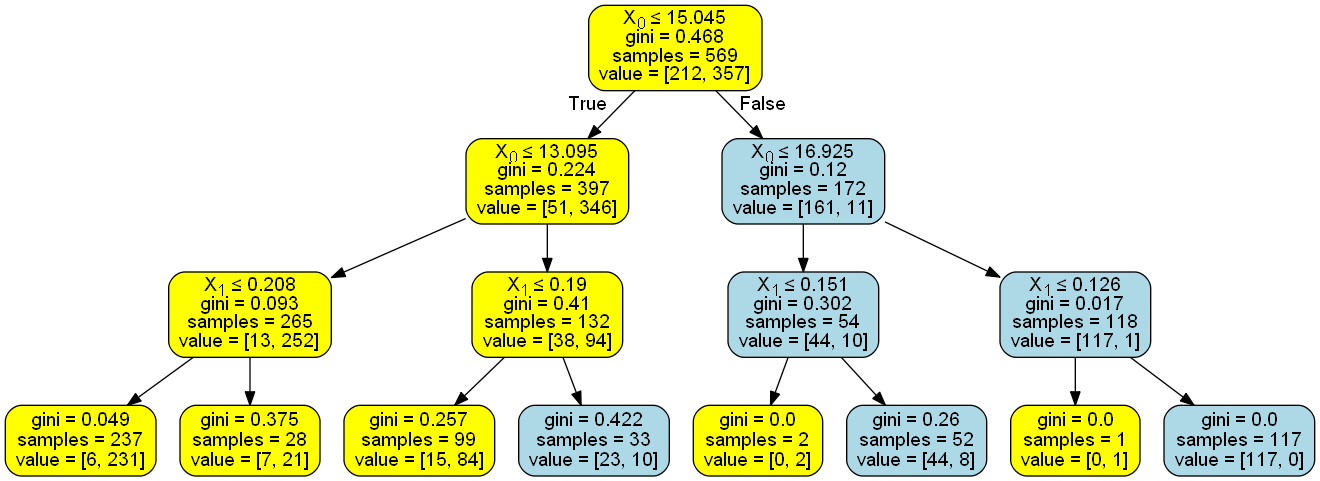

In [15]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import os, sys
import collections

def conda_fix(graph):
        path = os.path.join(sys.base_exec_prefix, "Library", "bin", "graphviz")
        paths = ("dot", "twopi", "neato", "circo", "fdp")
        paths = {p: os.path.join(path, "{}.exe".format(p)) for p in paths}
        graph.set_graphviz_executables(paths)

dot_data = StringIO()

export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

nodes = graph.get_node_list()

for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')]
        #values = [int(255 * v / sum(values)) for v in values]
        #print(values)
        #color = '#{:02x}{:02x}{:02x}'.format(values[0], values[1], values[1])
        if values[0] > values[1]:
            color = 'lightblue'
        else:
            color = 'yellow'
        #print(color)
        node.set_fillcolor(color)

conda_fix(graph)

#tree_4 max_depth5
#value is the [num_zero_classes, num_one_classes]
Image(graph.create_png())

In [16]:
import numpy as np
from collections import deque
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import _tree as ctree
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


class AABB:
    """Axis-aligned bounding box"""
    def __init__(self, n_features):
        self.limits = np.array([[-np.inf, np.inf]] * n_features)

    def split(self, f, v):
        left = AABB(self.limits.shape[0])
        right = AABB(self.limits.shape[0])
        left.limits = self.limits.copy()
        right.limits = self.limits.copy()

        left.limits[f, 1] = v
        right.limits[f, 0] = v

        return left, right


def tree_bounds(tree, n_features=None):
    """Compute final decision rule for each node in tree"""
    if n_features is None:
        n_features = np.max(tree.feature) + 1
    aabbs = [AABB(n_features) for _ in range(tree.node_count)]
    queue = deque([0])
    while queue:
        i = queue.pop()
        l = tree.children_left[i]
        r = tree.children_right[i]
        if l != ctree.TREE_LEAF:
            aabbs[l], aabbs[r] = aabbs[i].split(tree.feature[i], tree.threshold[i])
            queue.extend([l, r])
    return aabbs


def decision_areas(tree_classifier, maxrange, x=0, y=1, n_features=None):
    """ Extract decision areas.

    tree_classifier: Instance of a sklearn.tree.DecisionTreeClassifier
    maxrange: values to insert for [left, right, top, bottom] if the interval is open (+/-inf) 
    x: index of the feature that goes on the x axis
    y: index of the feature that goes on the y axis
    n_features: override autodetection of number of features
    """
    tree = tree_classifier.tree_
    aabbs = tree_bounds(tree, n_features)

    rectangles = []
    for i in range(len(aabbs)):
        if tree.children_left[i] != ctree.TREE_LEAF:
            continue
        l = aabbs[i].limits
        r = [l[x, 0], l[x, 1], l[y, 0], l[y, 1], np.argmax(tree.value[i])]
        rectangles.append(r)
    rectangles = np.array(rectangles)
    rectangles[:, [0, 2]] = np.maximum(rectangles[:, [0, 2]], maxrange[0::2])
    rectangles[:, [1, 3]] = np.minimum(rectangles[:, [1, 3]], maxrange[1::2])
    return rectangles

def plot_areas(rectangles):
    for rect in rectangles:
        color = ['b', 'y'][int(rect[4])]
        #print(rect[0], rect[1], rect[2] - rect[0], rect[3] - rect[1])
        rp = Rectangle([rect[0], rect[2]], 
                       rect[1] - rect[0], 
                       rect[3] - rect[2], color=color, alpha=0.3)
        plt.gca().add_artist(rp)

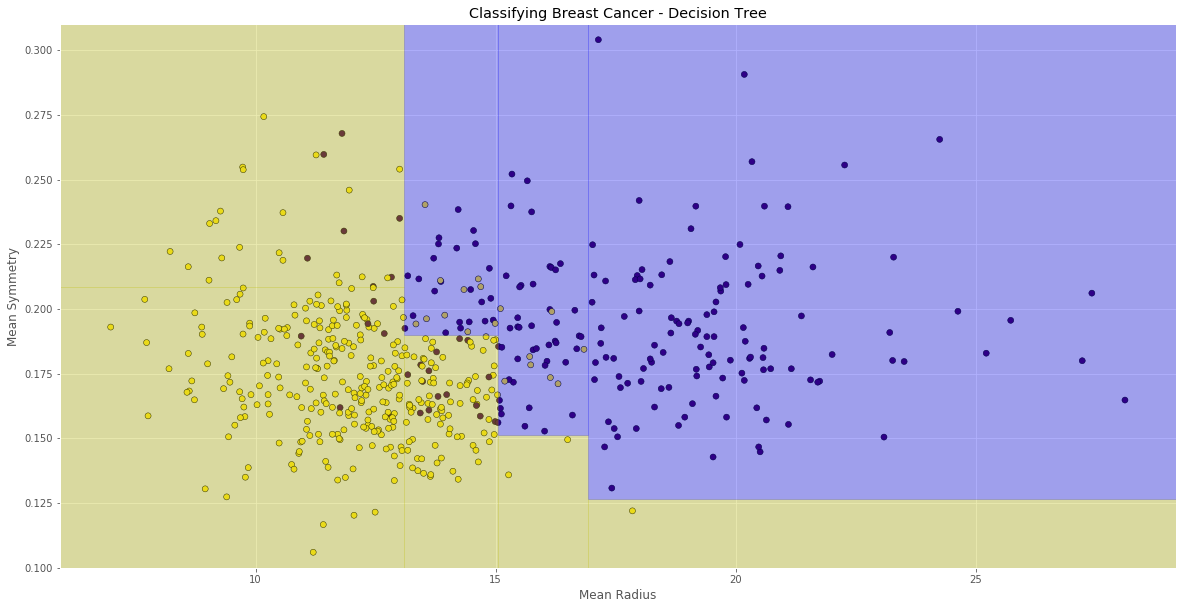

In [17]:
x1 = cancer_df['mean radius']
x2 = cancer_df['mean symmetry']
y = cancer_df.cancer
plt.figure(figsize=(20,10))
plt.title('Classifying Breast Cancer - Decision Tree')

plt.xlabel('Mean Radius')
plt.ylabel('Mean Symmetry')

plt.scatter(x1,x2,c=y, edgecolors='k')

rectangles = decision_areas(dtree, [5, 30, 0., 0.31])
plot_areas(rectangles)

#hack to reorient the axis limit
plt.ylim(0.1,0.31)

plt.show()

# Benchmarking Classifiers

## First Benchmark our original logistic regression model

### Accuracy is simple to understand, but doesn't make as much sense when benchmarking models

In [18]:
#baseline accuracy only using all 1 as a prediction
all_ones = np.ones(len(y))
print('baseline ones accuracy: ', accuracy_score(y, all_ones))

baseline ones accuracy:  0.6274165202108963


In [19]:
#baseline accuracy only using all 0 as a prediction
all_ones = np.zeros(len(y))
print('baseline zeros accuracy: ', accuracy_score(y, all_ones))

baseline zeros accuracy:  0.37258347978910367


In [20]:
#classifier accuracy
y_pred = lin_clf.predict(X)
print('lin_clf accuracy: ', accuracy_score(y, y_pred))

lin_clf accuracy:  0.8857644991212654


### Logloss on the other hand, will always give you 0.69 when you predict 50% for every example, 0 when you predict perfectly, and bad if you put all zeros or all ones

In [21]:
#baseline logloss
all_0 = np.ones(len(y))
print('baseline ones logloss: ', log_loss(y, all_0))

baseline ones logloss:  12.868875413666547


In [22]:
#baseline logloss
all_1 = np.ones(len(y))
print('baseline zeros logloss: ', log_loss(y, all_1))

baseline zeros logloss:  12.868875413666547


In [23]:
#baseline logloss
all_0_5 = np.ones(len(y)) * 0.5
print('baseline 50% logloss: ', log_loss(y, all_0_5))

baseline 50% logloss:  0.6931471805599453


In [24]:
print('perfect logloss: ', log_loss(y, y))

perfect logloss:  9.992007221626415e-16


In [25]:
#classifier logloss
print('lin_clf logloss: ',log_loss(y, lin_clf.predict_proba(X)))

lin_clf logloss:  0.3294374365126993


LogLoss does not change with the imbalance of classes

<img src="https://i.stack.imgur.com/n2WUl.png">

### Confusion Matrix

In [26]:
#classifier confusion matrix
confusion_matrix=cm(y, y_pred)
list1 = ["Actual 0", "Actual 1"]
list2 = ["Predicted 0", "Predicted 1"]
pd.DataFrame(confusion_matrix, list1,list2)

Predicted 0  Predicted 1
Actual 0          158           54
Actual 1           11          346

In [27]:
#let's look at a confusion matrix with a different threshold that might make sense in this scenario
#a hospital might want to reduce False Negatives
confusion_matrix=cm(y, lin_clf.predict_proba(X)[:,0] < 0.7)
list1 = ["Actual 0", "Actual 1"]
list2 = ["Predicted 0", "Predicted 1"]
pd.DataFrame(confusion_matrix, list1,list2)

Predicted 0  Predicted 1
Actual 0          120           92
Actual 1            2          355

## Next, Benchmark a logistic regression model with all features

In [28]:
#using all features
X = cancer_df.drop('cancer', axis = 1)
y = cancer_df.cancer

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [29]:
X.head()

mean radius mean texture mean perimeter mean area mean smoothness  \
0       17.99        10.38         122.80    1001.0         0.11840   
1       20.57        17.77         132.90    1326.0         0.08474   
2       19.69        21.25         130.00    1203.0         0.10960   
3       11.42        20.38          77.58     386.1         0.14250   
4       20.29        14.34         135.10    1297.0         0.10030   

  mean compactness mean concavity mean concave points mean symmetry  \
0          0.27760         0.3001             0.14710        0.2419   
1          0.07864         0.0869             0.07017        0.1812   
2          0.15990         0.1974             0.12790        0.2069   
3          0.28390         0.2414             0.10520        0.2597   
4          0.13280         0.1980             0.10430        0.1809   

  mean fractal dimension  ... worst radius worst texture worst perimeter  \
0                0.07871  ...        25.38         17.33          184.60   
1                0.05667  ...        24.99         23.41          158.80   
2                0.05999  ...        23.57         25.53          152.50   
3                0.09744  ...        14.91         26.50           98.87   
4                0.05883  ...        22.54         16.67          152.20   

  worst area worst smoothness worst compactness worst concavity  \
0     2019.0           0.1622            0.6656          0.7119   
1     1956.0           0.1238            0.1866          0.2416   
2     1709.0           0.1444            0.4245          0.4504   
3      567.7           0.2098            0.8663          0.6869   
4     1575.0           0.1374            0.2050          0.4000   

  worst concave points worst symmetry worst fractal dimension  
0               0.2654         0.4601                 0.11890  
1               0.1860         0.2750                 0.08902  
2               0.2430         0.3613                 0.08758  
3               0.2575         0.6638                 0.17300  
4               0.1625         0.2364                 0.07678  

[5 rows x 30 columns]

In [30]:
lin_clf2 = linear_model.LogisticRegression().fit(X, y)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
y_pred = lin_clf2.predict(X)
print('lin_clf2 accuracy: ',accuracy_score(y, y_pred))

lin_clf2 accuracy:  0.9595782073813708


In [32]:
print('lin_clf2 logloss: ',log_loss(y, lin_clf2.predict_proba(X)))

lin_clf2 logloss:  0.09214591499092101


In [33]:
confusion_matrix=cm(y, y_pred)
list1 = ["Actual 0", "Actual 1"]
list2 = ["Predicted 0", "Predicted 1"]
pd.DataFrame(confusion_matrix, list1,list2)

Predicted 0  Predicted 1
Actual 0          198           14
Actual 1            9          348